In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (roc_auc_score, f1_score, matthews_corrcoef, recall_score, classification_report)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

/home/asavari/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
data = pd.read_csv('/home/asavari/Downloads/Threats (1).csv')

In [3]:
data_cleaned = data.drop(columns=['id'], errors='ignore')
label_encoder = LabelEncoder()
data_cleaned['attack_cat_encoded'] = label_encoder.fit_transform(data_cleaned['attack_cat'])
data_cleaned = data_cleaned.drop(columns=['attack_cat'], errors='ignore')

X = data_cleaned.drop(columns=['attack_cat_encoded'], errors='ignore')
y = data_cleaned['attack_cat_encoded']

print("Classes in target variable:", label_encoder.classes_)

Classes in target variable: ['Analysis' 'Backdoor' 'DoS' 'Exploits' 'Fuzzers' 'Generic' 'Normal'
 'Reconnaissance' 'Shellcode' 'Worms']


In [4]:
# For missing values
X = X.fillna(0)

In [5]:
categorical_columns = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [7]:
classifier = DecisionTreeClassifier(random_state=42, class_weight="balanced")
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [8]:
# evaluation
y_pred = classifier.predict(X_test)

f1 = f1_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
mcc = matthews_corrcoef(y_test, y_pred)
auc = roc_auc_score(y_test, classifier.predict_proba(X_test), multi_class="ovr")

print("\nModel Performance Metrics:")
print("F1 Score (Test Set):", f1)
print("Recall Rate (Test Set):", recall)
print("MCC (Test Set):", mcc)
print("AUC (Test Set):", auc)


Model Performance Metrics:
F1 Score (Test Set): 0.8712634914475611
Recall Rate (Test Set): 0.871175
MCC (Test Set): 0.8568646288434713
AUC (Test Set): 0.9281322583399717


In [9]:
# Cross-validation
cv_scores = cross_val_score(classifier, X_resampled, y_resampled, cv=5, scoring='f1_weighted')
print("\nCross-Validation F1 Scores:", cv_scores)
print("Mean F1 Score (Cross-Validation):", cv_scores.mean())


Cross-Validation F1 Scores: [0.78134366 0.83213248 0.85364739 0.84902552 0.84028431]
Mean F1 Score (Cross-Validation): 0.8312866705877063


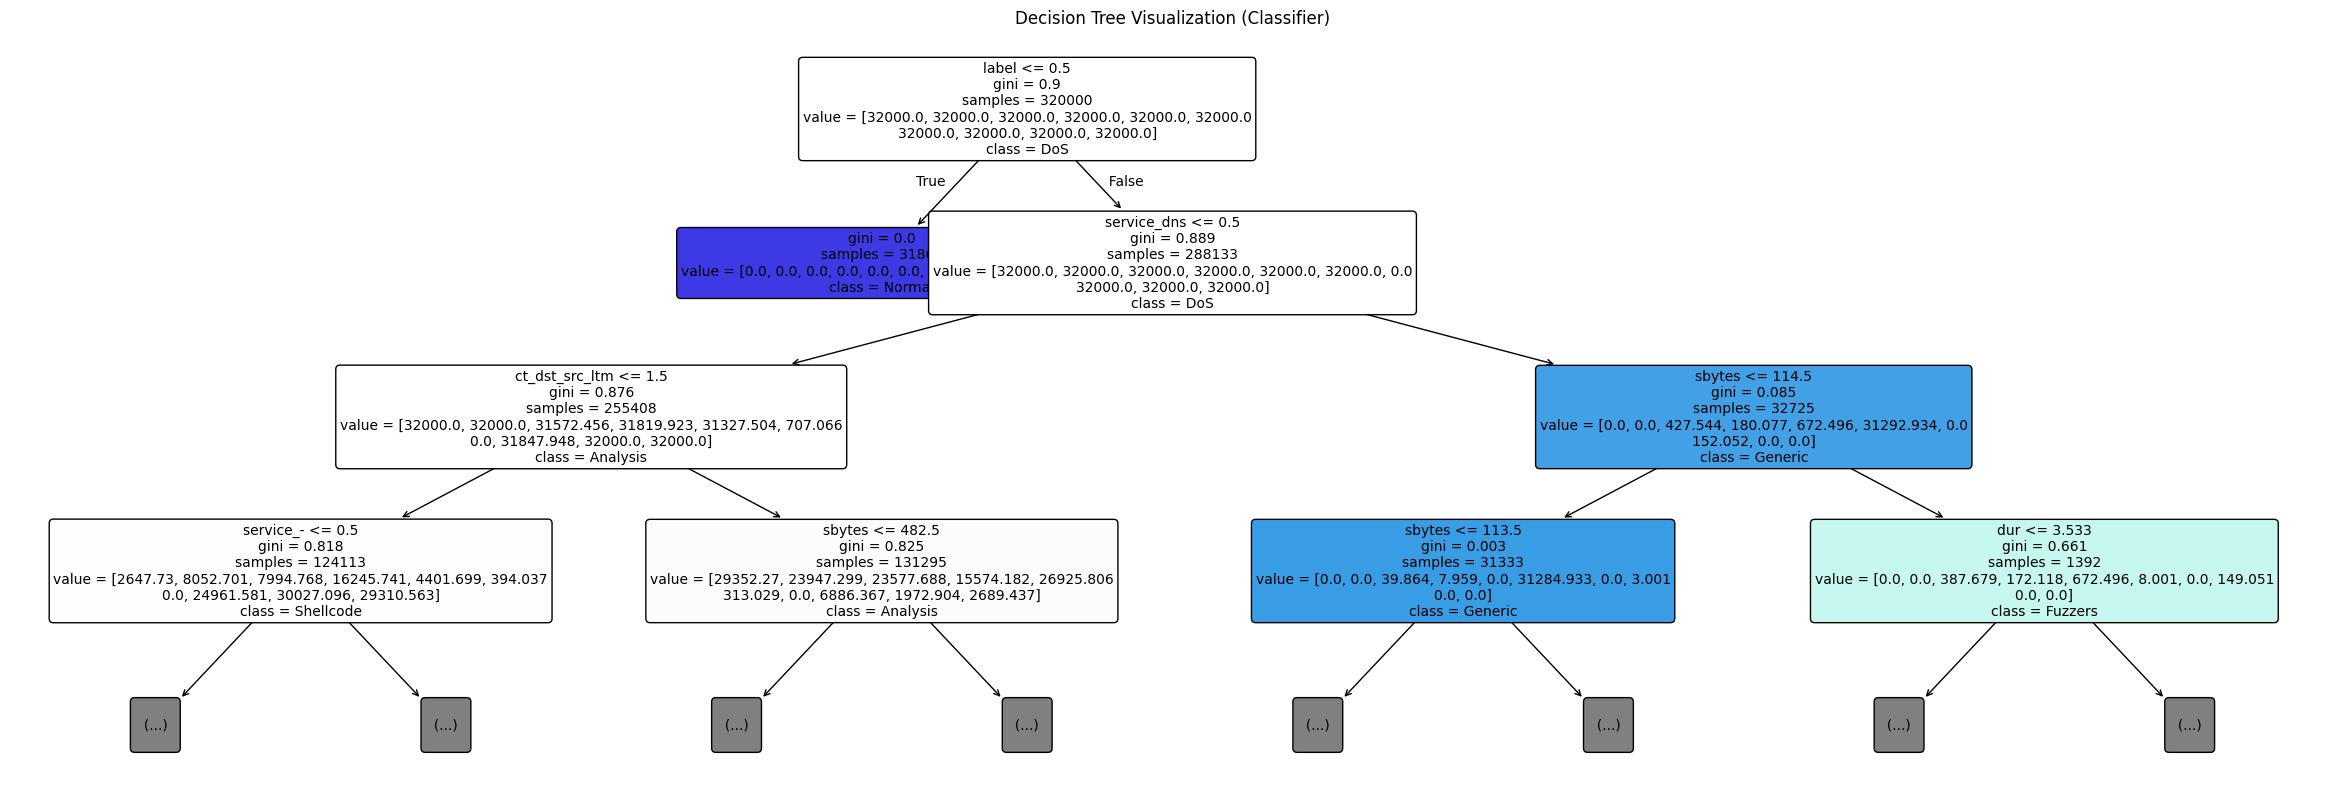

In [10]:
# Visualize the decision tree
plt.figure(figsize=(30, 10))
plot_tree(
    classifier,
    feature_names=X_train.columns,
    class_names=label_encoder.classes_,
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3
)
plt.title("Decision Tree Visualization (Classifier)")
plt.show()